

# MACHINE LEARNING AND DATA STREAMS
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<span style="color:steelblue;font-size: 1em;"> 06 November 2017</span>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
%matplotlib inline

# A bit if my background

![](Images/1_Dec.png)

<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# In a numerical world the rules/equations will be hardcoded into the program!
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />


In [14]:
# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 0.7 # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 30, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-r',markersize=3, lw=2)
trace1, = ax.plot([], [], '-', c='r',lw=.4)
# trace2, = ax.plot([], [], '-', c='g',lw=.4)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    trace1.set_data([], [])
    trace2.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    trace1.set_data(x1[:i], y1[:i])
    trace2.set_data(x2[:i], y2[:i])
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# ani.save('./Images/double_pendulum.mp4', fps=15)
ani.save('./Images/double_pendulum.mp4', fps=15, extra_args=['-vcodec', 'libx264'],dpi=200)
plt.close()

In [11]:
from IPython.display import HTML
HTML("""
<video width="600" height="400" controls>
  <source src="files/Images/double_pendulum.mp4" type="video/mp4">
</video>
""")

<span style="color:red;font-size: 3em;line-height: 100%;"> 
Limits to theory driven modeling </span>


<span style="color:green;font-size: 3em;line-height: 100%;"> 
In many complex fields that we don't know the equations or in principle, there is no single descriptive formula </span>

# Example:
### Translation (from one spoken language to another)
### Do we know how much people would pay for a product in the market? 
### How cities evlove over time?
### Do we know how people move (drive/bike/walk) in the city?


# On the other hand, thanks to advancements in ICT these days we have a lot of data from almost everything. The so called BIG DATA!

## This is not a simulation, but just GPS traces of cars in Beijing

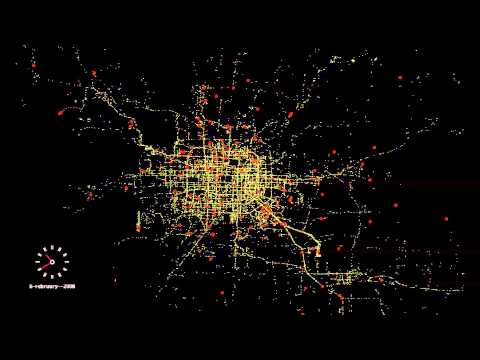

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('D6XTyLbO13w',width=800, height=400)

<hr style="height:4px;border:none;color:stillblue;background-color:black;" />

# Now welcome to the filed of data driven modeling
<hr style="height:4px;border:none;color:stillblue;background-color:black;" />


# With data we invert the whole process of modeling


## Least Square method (1801 Gauss)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8de16f280e8444dbfb086fecd842eaedd7e2d9f5)

<span style="color:red;font-size: 2em;line-height: 100%;"> 
And the whole field of machine learning is about how to find a good f. </span>


<span style="color:red;font-size: 2em;line-height: 100%;"> 
Note that the final model is not necessarily representational </span>

In [1]:
N = 400
x1= np.random.normal(loc=17,scale=5,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.4, size=N)[:,np.newaxis]

# x1 = np.random.uniform(size=N)[:,np.newaxis]
# y = np.sin(2*np.pi*x1**3)**3 + .1*np.random.randn(*x1.shape)

y =-.1*x1**3 + 2*x1*x1 + 2*np.sqrt(x1)+ 10*np.random.normal(loc=30.0, scale=4.7, size=len(x1))[:,np.newaxis]


# fig = plt.figure(figsize=(7,7))
# ax1= plt.subplot(111)
# plt.plot(x1,y,'.r',markersize=5,alpha=1 );
def polynomial_regr(degree=1):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn import linear_model
    
    
    
    X_tr = x1[:].astype(float)
    y_tr = y[:].astype(float)
    
#     X_ts = x1[150:]
#     y_ts = y[150:]
    
    poly = PolynomialFeatures(degree=degree)
    X_tr_ = poly.fit_transform(X_tr)
#     X_ts_ = poly.fit_transform(X_ts)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_tr_, y_tr)
    
    
    y_pred_tr = regr.predict(X_tr_)[:]
#     y_pred_ts = regr.predict(X_ts_)[:]
    # Predicting the training data
    plt.plot(X_tr,y_tr,'.r',markersize=10,alpha=.4 );
    plt.plot(X_tr,y_pred_tr,'.b',markersize=10,alpha=.4 );
from ipywidgets import interact, HTML, FloatSlider
interact(polynomial_regr,degree=(1,50,1));

NameError: name 'np' is not defined



## Or more coplicated cases: Computer vision problems 
![](Images/MLP_MNIST.png)

<span style="color:red;font-size: 3em;line-height: 100%;"> 
Machine learning as a type of probabilistic programming </span>
# Here, the rules are not hard-coded any longer in our computer program, but the program itself learns them

![](Images/probabilistic_Logical_network.png)


<span style="color:red;font-size: 3em;line-height: 100%;"> 
Then If expertise means that you know the rules, equations,... in a certain domain, now we can encapsulate any type of expertise! </span>

# With this new approach we can talk science differently!


![](Images/orthogonal.png)
#### Adopted from the original ideas of General Systems Theory


![](Images/DDM_Applications.png)

# And the Big Data is everywhere! You just need to learn to find it

## Web scraping
## APIs
## Social media
## ...

# Examples

![](Images/Cityastext.png)
https://sevamoo.github.io/cityastext/


<a></a>
<a></a>
<a></a>
<a></a>
<a></a>
<a></a>
<a></a>
![](Images/keylead.png)
http://www.keylead.ch/

# End to End Models  and generative models


![](Images/seq2seq.png)


### Sketch_RNN
https://magenta.tensorflow.org/sketch-rnn-demo

# can we do it also from the real buildings for example? 

![](Images/OSM_buildings.png)

# Thanks! 